In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [32]:
X,y = make_regression(n_samples=500,n_features=1,n_informative=1,noise=50,n_targets=1,random_state=4)

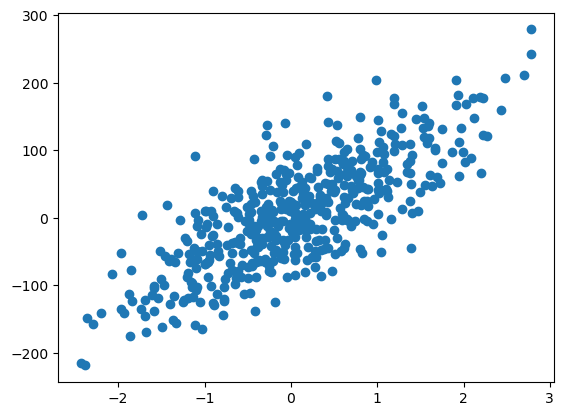

In [33]:
plt.scatter(X,y)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [36]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knr = KNeighborsRegressor()

In [37]:
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [39]:
knr.fit(X_train,y_train)

KNeighborsRegressor()

In [40]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knr.predict(X_test)

In [41]:
print('Simple lr r2_score ',r2_score(y_test,y_pred1))
print('Simple dt r2_score ',r2_score(y_test,y_pred2))
print('Simple knr r2_score ',r2_score(y_test,y_pred3))

Simple lr r2_score  0.6780725766864996
Simple dt r2_score  0.33219451998520644
Simple knr r2_score  0.6340640295706987


# Bagging Regressor

In [42]:
from sklearn.ensemble import BaggingRegressor

In [43]:
bag = BaggingRegressor(random_state=1)
bag.fit(X_train,y_train)

BaggingRegressor(random_state=1)

In [44]:
y_pred4 = bag.predict(X_test)

In [46]:
bag.score(X_train,y_train)

0.9012613326578083

In [47]:
bag.score(X_test,y_test)

0.4945229414673179

In [48]:
r2_score(y_test,y_pred4)

0.4945229414673179

# Grid Search CV

In [57]:
param = {
    'base_estimator':[None,LinearRegression(),KNeighborsRegressor()],
    'n_estimators':[20,50,100],
    'max_samples':[0.5,1.0],
    'max_features':[0.5,1.0],
    'bootstrap':[True,False],
    'bootstrap_features':[True,False],
    'oob_score':[True,False]
    }

In [58]:
br_grid = GridSearchCV(BaggingRegressor(random_state=1,n_jobs=-1), param_grid=param, cv=3, n_jobs=-1, verbose=1)

In [59]:
br_grid.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


C:\Users\M.Muzzamil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
216 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\M.Muzzamil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\M.Muzzamil\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\M.Muzzamil\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py", line 338, in f

GridSearchCV(cv=3, estimator=BaggingRegressor(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'base_estimator': [None, LinearRegression(),
                                            KNeighborsRegressor()],
                         'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [20, 50, 100],
                         'oob_score': [True, False]},
             verbose=1)

In [60]:
br_grid.best_estimator_.score(X_train,y_train)

0.5754958705976838

In [61]:
br_grid.best_estimator_.score(X_test,y_test)

0.6777244535579181

In [62]:
br_grid.best_score_

0.5646744820324184

In [63]:
br_grid.best_params_

{'base_estimator': LinearRegression(),
 'bootstrap': False,
 'bootstrap_features': True,
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 20,
 'oob_score': False}